In [1]:
class CreateDataset:
    # Path of GTZAN dataset
    DATASET_DIRECTORY = "F:/ML/project/genres/"

    # Sampling rate (Hz)
    SAMPLING_RATE = 22050

    # Frame size (Samples)
    FRAME_SIZE = 2048

    # Hop Size (Samples)
    HOP_SIZE = 512


In [2]:
import librosa
import numpy
import pandas
import os
import sklearn

In [3]:
def get_sample_arrays(dataset_dir, folder_name, samp_rate):
    path_of_audios = librosa.util.find_files(dataset_dir + folder_name + "/")
    audios = []
    print(dataset_dir + folder_name)
    for audio in path_of_audios:
        x, sr = librosa.load(audio, sr=samp_rate, duration=30.0)
        audios.append(x)
    audios_numpy = numpy.array(audios)
    return audios_numpy


def extract_features(signal, sample_rate, frame_size, hop_size):
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=signal, frame_length=frame_size, hop_length=hop_size)
    spectral_centroid = librosa.feature.spectral_centroid(y=signal, sr=sample_rate, n_fft=frame_size,
                                                          hop_length=hop_size)
    spectral_contrast = librosa.feature.spectral_contrast(y=signal, sr=sample_rate, n_fft=frame_size,
                                                          hop_length=hop_size)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=signal, sr=sample_rate, n_fft=frame_size,
                                                            hop_length=hop_size)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=signal, sr=sample_rate, n_fft=frame_size, hop_length=hop_size)
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=frame_size, hop_length=hop_size)
    return [

        numpy.mean(zero_crossing_rate),
        numpy.std(zero_crossing_rate),
        numpy.mean(spectral_centroid),
        numpy.std(spectral_centroid),
        numpy.mean(spectral_contrast),
        numpy.std(spectral_contrast),
        numpy.mean(spectral_bandwidth),
        numpy.std(spectral_bandwidth),
        numpy.mean(spectral_rolloff),
        numpy.std(spectral_rolloff),

        numpy.mean(mfccs[1, :]),
        numpy.std(mfccs[1, :]),
        numpy.mean(mfccs[2, :]),
        numpy.std(mfccs[2, :]),
        numpy.mean(mfccs[3, :]),
        numpy.std(mfccs[3, :]),
        numpy.mean(mfccs[4, :]),
        numpy.std(mfccs[4, :]),
        numpy.mean(mfccs[5, :]),
        numpy.std(mfccs[5, :]),
        numpy.mean(mfccs[6, :]),
        numpy.std(mfccs[6, :]),
        numpy.mean(mfccs[7, :]),
        numpy.std(mfccs[7, :]),
        numpy.mean(mfccs[8, :]),
        numpy.std(mfccs[8, :]),
        numpy.mean(mfccs[9, :]),
        numpy.std(mfccs[9, :]),
        numpy.mean(mfccs[10, :]),
        numpy.std(mfccs[10, :]),
        numpy.mean(mfccs[11, :]),
        numpy.std(mfccs[11, :]),
        numpy.mean(mfccs[12, :]),
        numpy.std(mfccs[12, :]),
        numpy.mean(mfccs[13, :]),
        numpy.std(mfccs[13, :]),
    ]

In [4]:
samp_rate = CreateDataset.SAMPLING_RATE
frame_size = CreateDataset.FRAME_SIZE
hop_size = CreateDataset.HOP_SIZE
dataset_dir = CreateDataset.DATASET_DIRECTORY

#sub_folders = get_subdirectories(dataset_dir)

labels = []
is_created = False
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    print(".....Working in folder:", g)
    sample_arrays = get_sample_arrays(dataset_dir, g, samp_rate)
    print(sample_arrays)
    for sample_array in sample_arrays:
        row = extract_features(sample_array, samp_rate, frame_size, hop_size)
        if not is_created:
            dataset_numpy = numpy.array(row)
            is_created = True
        elif is_created:
            dataset_numpy = numpy.vstack((dataset_numpy, row))
        labels.append(g)



"""print("Normalizing the data...")
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
dataset_numpy = scaler.fit_transform(dataset_numpy)"""

.....Working in folder: blues
F:/ML/project/genres/blues
[[ 0.00732422  0.01660156  0.00762939 ...  0.18188477  0.1637268
   0.15093994]
 [ 0.00341797  0.00430298  0.00137329 ...  0.03152466  0.04238892
   0.06607056]
 [ 0.01901245  0.04769897  0.02941895 ... -0.3409729  -0.3360901
  -0.37509155]
 ...
 [ 0.06954956  0.11352539  0.10494995 ... -0.13357544 -0.1477356
  -0.16989136]
 [ 0.17141724  0.23706055  0.10256958 ...  0.09591675  0.04598999
   0.06069946]
 [-0.00332642 -0.01135254 -0.00799561 ...  0.05996704  0.05725098
   0.05300903]]
Size
661500
.....Working in folder: classical
F:/ML/project/genres/classical
[array([-0.02008057, -0.01748657,  0.00418091, ...,  0.02758789,
        0.03158569,  0.03356934], dtype=float32)
 array([-0.01138306, -0.00216675,  0.01687622, ...,  0.00326538,
       -0.00811768, -0.02017212], dtype=float32)
 array([-4.0466309e-02, -7.8155518e-02, -8.7371826e-02, ...,
        6.1035156e-05,  5.8898926e-03,  3.7231445e-03], dtype=float32)
 array([-0.008331

Size
661500
.....Working in folder: country
F:/ML/project/genres/country
[array([-0.13415527, -0.19485474, -0.04257202, ..., -0.40274048,
       -0.33346558, -0.26315308], dtype=float32)
 array([ 0.29504395,  0.23028564, -0.04922485, ...,  0.2628479 ,
        0.3867798 ,  0.466156  ], dtype=float32)
 array([-0.04248047, -0.10879517,  0.07177734, ...,  0.10348511,
        0.13223267,  0.14581299], dtype=float32)
 array([-0.10095215, -0.09753418, -0.09039307, ..., -0.03274536,
       -0.10858154, -0.18585205], dtype=float32)
 array([-0.01025391,  0.0994873 ,  0.26113892, ..., -0.04290771,
       -0.12988281, -0.0798645 ], dtype=float32)
 array([-0.4046631 , -0.31704712, -0.26437378, ...,  0.08087158,
        0.02874756,  0.01977539], dtype=float32)
 array([-0.24227905, -0.2866211 , -0.29736328, ..., -0.18600464,
       -0.17004395, -0.1647644 ], dtype=float32)
 array([ 0.1643982 ,  0.04977417,  0.08407593, ..., -0.11746216,
       -0.24118042, -0.17047119], dtype=float32)
 array([ 0.0971

Size
661500
.....Working in folder: disco
F:/ML/project/genres/disco
[array([-0.23202515, -0.23168945, -0.1979065 , ...,  0.12741089,
        0.04037476,  0.04598999], dtype=float32)
 array([-0.18777466, -0.23693848, -0.15542603, ...,  0.05749512,
        0.13787842,  0.17175293], dtype=float32)
 array([ 0.09420776,  0.09906006,  0.0581665 , ..., -0.12139893,
       -0.15167236, -0.18341064], dtype=float32)
 array([-0.336792  , -0.18792725, -0.21746826, ...,  0.0748291 ,
       -0.12026978, -0.24267578], dtype=float32)
 array([ 0.00262451,  0.01730347, -0.01803589, ...,  0.08956909,
        0.09320068,  0.0062561 ], dtype=float32)
 array([ 0.32540894,  0.35195923,  0.26452637, ..., -0.40304565,
       -0.23510742, -0.13647461], dtype=float32)
 array([-0.19967651, -0.10507202, -0.08612061, ..., -0.1560669 ,
       -0.0456543 ,  0.1456604 ], dtype=float32)
 array([-0.15805054, -0.14486694, -0.06796265, ..., -0.06924438,
       -0.07339478, -0.0151062 ], dtype=float32)
 array([ 0.02011108

Size
661500
.....Working in folder: hiphop
F:/ML/project/genres/hiphop
[array([-0.16915894, -0.021698  ,  0.01956177, ..., -0.08758545,
        0.02758789,  0.05059814], dtype=float32)
 array([ 0.0480957 , -0.20150757, -0.25741577, ..., -0.00500488,
       -0.00860596, -0.02160645], dtype=float32)
 array([-0.03308105, -0.04275513, -0.04620361, ...,  0.10458374,
        0.11700439,  0.10971069], dtype=float32)
 array([-0.18231201, -0.18560791, -0.16290283, ..., -0.10726929,
       -0.16860962, -0.17803955], dtype=float32)
 array([ 0.28173828,  0.29385376,  0.29632568, ..., -0.28851318,
       -0.31082153, -0.26635742], dtype=float32)
 array([-0.40853882, -0.3512268 , -0.30819702, ..., -0.34259033,
       -0.18435669, -0.03552246], dtype=float32)
 array([0.81396484, 0.7850647 , 0.74087524, ..., 0.878479  , 0.95706177,
       0.9774475 ], dtype=float32)
 array([ 0.22296143,  0.18984985,  0.12454224, ..., -0.2227478 ,
       -0.25894165, -0.269989  ], dtype=float32)
 array([ 0.00064087, -0

Size
661500
.....Working in folder: jazz
F:/ML/project/genres/jazz
[[-0.00924683 -0.01177979 -0.01370239 ...  0.00924683  0.01101685
   0.01248169]
 [ 0.00241089  0.00549316  0.00866699 ... -0.00033569  0.00460815
   0.00396729]
 [ 0.00335693  0.00491333  0.00378418 ...  0.04229736  0.02011108
  -0.00323486]
 ...
 [ 0.02279663  0.03564453  0.02920532 ... -0.00527954 -0.00537109
  -0.00491333]
 [-0.03106689 -0.05078125 -0.04537964 ...  0.02114868  0.02804565
   0.07513428]
 [-0.01385498 -0.00756836  0.00662231 ... -0.03781128 -0.04214478
  -0.04266357]]
Size
661500
.....Working in folder: metal
F:/ML/project/genres/metal
[[-0.12237549 -0.04919434  0.04440308 ...  0.0324707  -0.10717773
  -0.11560059]
 [ 0.1164856   0.1194458   0.12341309 ... -0.03744507 -0.06945801
  -0.06707764]
 [-0.0234375  -0.1100769  -0.11660767 ...  0.17355347  0.25320435
   0.19668579]
 ...
 [ 0.04193115  0.06799316  0.05114746 ...  0.0675354   0.0604248
  -0.0100708 ]
 [-0.06201172 -0.0647583   0.01269531 ... -0

Size
661500


'print("Normalizing the data...")\nscaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))\ndataset_numpy = scaler.fit_transform(dataset_numpy)'

In [7]:
dataset_numpy[0]

array([ 8.30663911e-02,  2.76899674e-02,  1.78442045e+03,  3.60263361e+02,
        2.05307325e+01,  8.76100854e+00,  2.00265019e+03,  2.93081963e+02,
        3.80648532e+03,  9.49558806e+02,  1.21557297e+02,  1.72009087e+01,
       -1.91588249e+01,  1.53507814e+01,  4.23510323e+01,  1.22848825e+01,
       -6.37645817e+00,  1.29570999e+01,  1.86188755e+01,  9.44580555e+00,
       -1.36979113e+01,  8.22503567e+00,  1.53446312e+01,  8.30554867e+00,
       -1.22852669e+01,  9.06161785e+00,  1.09804926e+01,  7.96351719e+00,
       -8.32432461e+00,  7.86214113e+00,  8.81066895e+00,  7.15739965e+00,
       -3.66736865e+00,  6.42219925e+00,  5.75169039e+00,  6.36907816e+00])

In [27]:
x,y=librosa.load("F:/ML/project/genres/hiphop/hiphop.00000.wav", mono=True, duration=8)

In [6]:
print("Normalizing the data...")
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
dataset_numpy = scaler.fit_transform(dataset_numpy)
Feature_Names = ['meanZCR', 'stdZCR', 'meanSpecCentroid', 'stdSpecCentroid', 'meanSpecContrast', 'stdSpecContrast',
                     'meanSpecBandwidth', 'stdSpecBandwidth', 'meanSpecRollof', 'stdSpecRollof',
                     'meanMFCC_1', 'stdMFCC_1', 'meanMFCC_2', 'stdMFCC_2', 'meanMFCC_3', 'stdMFCC_3',
                     'meanMFCC_4', 'stdMFCC_4', 'meanMFCC_5', 'stdMFCC_5', 'meanMFCC_6', 'stdMFCC_6',
                     'meanMFCC_7', 'stdMFCC_7', 'meanMFCC_8', 'stdMFCC_8', 'meanMFCC_9', 'stdMFCC_9',
                     'meanMFCC_10', 'stdMFCC_10', 'meanMFCC_11', 'stdMFCC_11', 'meanMFCC_12', 'stdMFCC_12',
                     'meanMFCC_13', 'stdMFCC_13'
                     ]
dataset_pandas = pandas.DataFrame(dataset_numpy, columns=Feature_Names)
dataset_pandas["genre"] = labels
dataset_pandas.to_csv("F:/ML/project/music_data_set_30.csv", index=False)
print("Data set has been created and sent to the project folder!")

Normalizing the data...
Data set has been created and sent to the project folder!


In [1]:
# Analysing the Data in Pandas
import pandas as pd
data = pd.read_csv('F:/ML/project/music_data_set_30.csv')
data.head()

,meanZCR,stdZCR,meanSpecCentroid,stdSpecCentroid,meanSpecContrast,stdSpecContrast,meanSpecBandwidth,stdSpecBandwidth,meanSpecRollof,stdSpecRollof,...,stdMFCC_9,meanMFCC_10,stdMFCC_10,meanMFCC_11,stdMFCC_11,meanMFCC_12,stdMFCC_12,meanMFCC_13,stdMFCC_13,genre
0,-0.515141,-0.741230,-0.371465,-0.671854,-0.026343,0.354872,-0.154034,-0.481662,-0.228639,-0.413032,...,-0.505242,-0.132329,-0.671363,0.267462,-0.560970,0.176203,-0.647905,0.193121,-0.719671,blues
1,-0.728646,-0.613803,-0.503220,-0.366080,-0.006158,0.227762,-0.126489,-0.017802,-0.293645,0.136622,...,-0.192669,-0.010766,-0.427439,0.090654,-0.150531,0.246566,-0.393734,0.093335,-0.483360,blues
2,-0.568598,-0.691486,-0.491500,-0.629090,0.204690,0.346635,-0.349689,-0.529107,-0.421886,-0.458822,...,-0.467552,-0.343388,-0.698359,0.111892,-0.425601,-0.081841,-0.437500,-0.251308,-0.586866,blues
3,-0.908281,-0.828743,-0.741137,-0.588106,0.098152,0.160377,-0.465198,-0.166469,-0.637718,-0.219701,...,-0.439467,0.093211,-0.403066,0.127257,-0.594198,0.234875,-0.474250,-0.250668,-0.554923,blues
4,-0.369494,-0.538357,-0.345032,-0.398982,0.103555,0.154513,-0.348772,-0.469742,-0.285541,-0.197365,...,-0.224843,-0.341660,-0.559558,-0.330695,-0.229992,0.015265,-0.174060,-0.672296,-0.497577,blues


In [2]:
df=data.sample(frac=1).reset_index(drop=True)
df

,meanZCR,stdZCR,meanSpecCentroid,stdSpecCentroid,meanSpecContrast,stdSpecContrast,meanSpecBandwidth,stdSpecBandwidth,meanSpecRollof,stdSpecRollof,...,stdMFCC_9,meanMFCC_10,stdMFCC_10,meanMFCC_11,stdMFCC_11,meanMFCC_12,stdMFCC_12,meanMFCC_13,stdMFCC_13,genre
0,-0.032740,-0.424386,0.179005,-0.433896,-0.005997,0.841473,0.224942,-0.680975,0.307195,-0.521543,...,-0.629265,-0.266027,-0.723154,0.571984,-0.741985,-0.002733,-0.509775,0.444145,-0.704661,metal
1,-0.095812,0.108232,0.090291,0.079615,-0.551287,-0.609721,0.160915,-0.304161,0.125349,-0.084650,...,-0.279936,0.154018,-0.566698,-0.259247,-0.384787,0.264447,-0.509161,-0.389168,-0.670171,hiphop
2,0.381430,-0.551916,0.282678,-0.701102,-0.107975,0.752252,0.118719,-0.815596,0.239590,-0.678275,...,-0.661955,-0.436124,-0.906405,0.579689,-0.911989,-0.565005,-0.809990,0.554597,-0.912090,metal
3,0.146685,0.140191,0.617952,-0.046144,-0.460811,-0.673953,0.798679,-0.329212,0.796812,-0.206466,...,-0.457760,0.186934,-0.646766,-0.220018,-0.424621,0.237173,-0.511775,-0.276574,-0.724719,pop
4,-0.601175,-0.446039,-0.357608,-0.127763,0.196811,0.215155,-0.141108,-0.072537,-0.216611,0.117886,...,-0.088592,-0.104067,-0.438299,0.376231,-0.300696,-0.045099,-0.151488,0.001482,-0.375748,reggae
5,-0.798615,-0.685174,-0.631381,-0.445261,0.253278,0.067465,-0.363113,-0.148116,-0.513896,-0.182603,...,-0.272518,-0.172889,-0.525007,0.055596,-0.563744,-0.055460,-0.534889,-0.032783,-0.677390,rock
6,-0.790938,-0.643029,-0.680043,-0.372229,0.817713,0.075418,-0.398935,-0.058268,-0.598712,0.140516,...,-0.341773,-0.310000,-0.404073,-0.644307,-0.036864,-0.098261,0.101732,-0.773121,-0.159046,blues
7,0.032743,-0.522423,0.080735,-0.581542,-0.253316,0.732833,0.108775,-0.789036,0.162984,-0.540695,...,-0.671652,-0.274523,-0.791204,0.511663,-0.779904,-0.384881,-0.813900,0.034021,-0.791744,metal
8,-0.215692,-0.048463,0.412469,0.099202,-0.351823,-0.355404,0.716514,-0.480463,0.597686,-0.234123,...,-0.258268,0.338062,-0.433256,0.015196,-0.360364,0.514324,-0.452900,-0.010184,-0.712117,hiphop
9,-0.087045,0.659419,0.521595,0.720349,-0.442669,-0.681736,0.847361,-0.130083,0.725223,0.380043,...,-0.111103,0.109697,-0.527895,-0.079014,-0.254212,0.399103,-0.360508,-0.213406,-0.605961,pop


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
y=df['genre']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
df.drop(['genre'],axis=1,inplace=True)

In [4]:
list(encoder.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [5]:
#Scaling the feature columns'
import numpy as np
scaler = StandardScaler()
X = scaler.fit_transform(np.array(df, dtype = float))

In [6]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.metrics import classification_report

In [54]:
#SVM
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear').fit(X_train, y_train)

In [55]:
svm_train_accuracy = svm_linear.score(X_train, y_train)
svm_test_accuracy = svm_linear.score(X_test,y_test)
print("Training Accuracy  : ",svm_train_accuracy*100)
print("Test Accuracy  : ",svm_test_accuracy*100)

Training Accuracy  :  88.875
Test Accuracy  :  69.5


In [18]:
predictions = svm_linear.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.90      0.73        20
           1       0.76      0.68      0.72        19
           2       0.65      0.65      0.65        23
           3       0.71      0.79      0.75        19
           4       0.73      0.73      0.73        22
           5       0.56      0.62      0.59        16
           6       0.86      0.90      0.88        20
           7       0.86      0.83      0.84        23
           8       0.47      0.44      0.45        16
           9       0.67      0.36      0.47        22

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.70      0.69      0.69       200



In [76]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [77]:
knn_train_accuracy = neigh.score(X_train, y_train)
knn_test_accuracy = neigh.score(X_test,y_test)
print("Training Accuracy  : ",knn_train_accuracy*100)
print("Test Accuracy  : ",knn_test_accuracy*100)

Training Accuracy  :  72.75
Test Accuracy  :  59.0


In [25]:
knn_predictions = neigh.predict(X_test)
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        20
           1       0.76      0.84      0.80        19
           2       0.45      0.65      0.54        23
           3       0.41      0.47      0.44        19
           4       0.60      0.55      0.57        22
           5       0.60      0.38      0.46        16
           6       0.82      0.90      0.86        20
           7       0.67      0.78      0.72        23
           8       0.40      0.38      0.39        16
           9       0.53      0.36      0.43        22

    accuracy                           0.59       200
   macro avg       0.59      0.58      0.58       200
weighted avg       0.59      0.59      0.58       200



In [46]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(penalty="l2",solver="liblinear",max_iter=200).fit(X_train, y_train)

d:\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [47]:
lr_train_accuracy = clf_logistic.score(X_train, y_train)
lr_test_accuracy = clf_logistic.score(X_test,y_test)
print("Training Accuracy  : ",lr_train_accuracy*100)
print("Test Accuracy  : ",lr_test_accuracy*100)

Training Accuracy  :  77.5
Test Accuracy  :  65.5


In [30]:
lr_predictions = clf_logistic.predict(X_test)
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.54      0.75      0.63        20
           1       0.89      0.84      0.86        19
           2       0.65      0.57      0.60        23
           3       0.65      0.68      0.67        19
           4       0.68      0.59      0.63        22
           5       0.50      0.62      0.56        16
           6       0.75      0.90      0.82        20
           7       0.76      0.83      0.79        23
           8       0.44      0.50      0.47        16
           9       0.75      0.27      0.40        22

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.64       200
weighted avg       0.67      0.66      0.65       200



In [8]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
for i in range(2,20):
    forest=RandomForestClassifier(n_estimators=i)
    forest.fit(X_train, y_train)


In [9]:
rf_train_accuracy = forest.score(X_train, y_train)
rf_test_accuracy = forest.score(X_test,y_test)
print("Training Accuracy  : ",rf_train_accuracy*100)
print("Test Accuracy  : ",rf_test_accuracy*100)

Training Accuracy  :  99.875
Test Accuracy  :  67.0


In [10]:
rf_predictions = forest.predict(X_test)
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.60      0.80      0.69        15
           1       0.88      0.82      0.85        28
           2       0.56      0.58      0.57        24
           3       0.57      0.57      0.57        21
           4       0.48      0.77      0.59        13
           5       0.71      0.60      0.65        20
           6       0.89      0.89      0.89        19
           7       0.62      0.75      0.68        20
           8       0.80      0.55      0.65        22
           9       0.58      0.39      0.47        18

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.66       200
weighted avg       0.69      0.67      0.67       200



#### Plotting Accuracy

In [56]:
tr = []
te = []

In [57]:
tr.append(knn_train_accuracy*100)
te.append(knn_test_accuracy*100)
tr.append(lr_train_accuracy*100)
te.append(lr_test_accuracy*100)
tr.append(svm_train_accuracy*100)
te.append(svm_test_accuracy*100)
tr.append(rf_train_accuracy*100)
te.append(rf_test_accuracy*100)
tr.append(98.375)
te.append(72.5)

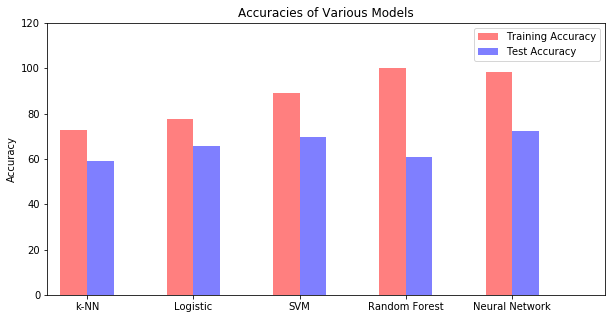

In [63]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
pos = list(range(len(te))) 
width = 0.25

fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos,tr,width,alpha=0.5,color="red" ,label="Training Accuracy")
plt.bar([p + width for p in pos],te,width,alpha=0.5,color="blue",label="Test Accuracy")
ax.set_ylabel('Accuracy')
ax.set_title('Accuracies of Various Models')
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(['k-NN','Logistic','SVM','Random Forest' , 'Neural Network'])
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, 120] )
plt.legend()
#plt.savefig('accuracies.png',  bbox_inches='tight',dpi=250)
plt.show()